## Problem 1: Gillespie’s Direct Algorithm
We have discussed the five hallmarks of stochastic SIR dynamics: variability; negative
co-variances; increased transients; stochastic resonance; and extinctions. Some of those
were demonstrated in the stochastic versions of the SIR ODEs (using constant or scaled
noise terms) and some were shown in the context of event driven SIR.

We ask you to explore the five hallmarks in an SIR discrete event model using Gillespie’s
direct algorithm. Design a set of well chosen experiments to demonstrate all these aspects,also exploring the dependence on the basic parameters in the model.

Advanced topic: Try to reproduce the graphs from the book in relation to persistence
and critical community size, or try to measure e.g. the first passage time. You can also
consider other models, e.g. SIS, SEIR, SIRS, etc.

Hint: start with SIR without demography, then add demography, and finally add imports
to the model.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate, optimize
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.fftpack import fft

In [5]:
# SIR model
def sir_without(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# initial conditions: infecteds, removed and subsceptibles
I0, R0 = 0.01, 0
S0 = 1 - I0 - R0
y0 = [S0, I0, R0]

# set values for beta and gamma
beta = 3
gamma = 1

# set a time interval
t = np.linspace(0, 10, 100)

ret = odeint(sir_without, y0, t, args=(beta, gamma))
S, I, R = ret.T

1. Label all possible events E1,...,En. 
2. For each event determine the rate at which it occurs, R1,...,Rn. 
3. The rate at which any event occurs is Rtotal =
4. The time until the next event is δt = −1 Rtotal log(RAND1). ?n m=1 Rm.
5. Generate a new random number, RAND2. Set P =RAND2 ×Rtotal .
6. Event p occurs if 
7. The time is now updated, t → t +δt, and event p is performed.
8. Return to Step 2.

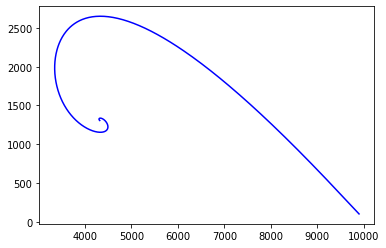

In [13]:
# Phase plot

def diff(y, t, beta, gamma):
    S, I, R, N = y
    dSdt = mu * N -beta * S * I / N - mu * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dNdt = dSdt + dIdt + dRdt
    return [dSdt, dIdt, dRdt, dNdt]

# set initial conditions and time interval
N0 = 10000
Y0 = 100
Z0 = 0
X0 = N0 - Y0 - Z0
y0 = [X0, Y0, Z0, N0]

# epidemic
beta = 1 / 2
gamma = 1 /6 
mu = 0.05

t = np.linspace(0, 100, 1000)

# set first intial conditions
    
# draw data in plot
ret = odeint(diff, y0, t, args=(beta, gamma))
S, I, R, N = ret.T
plt.plot(S, I, 'b')
#     ax.scatter(initialconditions[i][0], initialconditions[i][1], s = 15, color = 'k')


plt.show()